In [242]:
# Recommendation System

In [243]:
# Importing all the necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [244]:
# Data Description:

# Unique ID of each anime.
# Anime title.
# Anime broadcast type, such as TV, OVA, etc.
# anime genre.
# The number of episodes of each anime.
# The average rating for each anime compared to the number of users who gave ratings.

In [245]:
# Data Preprocessing:

In [246]:
df=pd.read_csv('anime.csv')
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [247]:
df.shape

(12294, 7)

In [248]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
anime_id,12294.0,14058.221653,11455.294701,1.00,3484.25,10260.50,24794.50,34527.0
rating,12064.0,6.473902,1.026746,1.67,5.88,6.57,7.18,10.0
members,12294.0,18071.338864,54820.676925,5.00,225.00,1550.00,9437.00,1013917.0


In [249]:
#number of unique users in the dataset
len(df.anime_id.unique())

12294

In [250]:
len(df.name.unique())

12292

In [251]:
# finding missing values if any:
# No missing values
df.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [252]:
df[df.isna().any(axis=1)]

,anime_id,name,genre,type,episodes,rating,members
2844,33242,IS: Infinite Stratos 2 - Infinite Wedding,NaN,Special,1,7.15,6604
3541,33589,ViVid Strike!,NaN,TV,12,6.96,12345
6040,29765,Metropolis (2009),NaN,Movie,1,6.27,313
6646,32695,Match Shoujo,NaN,ONA,1,6.02,242
7018,33187,Katsudou Shashin,NaN,Movie,1,5.79,607
...,...,...,...,...,...,...,...
12274,34492,Nuki Doki! Tenshi to Akuma no Sakusei Battle -...,Hentai,OVA,Unknown,NaN,392
12279,34491,Sagurare Otome The Animation,Hentai,OVA,1,NaN,79
12280,34312,Saimin Class,Hentai,OVA,Unknown,NaN,240
12282,34388,Shikkoku no Shaga The Animation,Hentai,OVA,Unknown,NaN,195


In [253]:
# we can fill the genre feature with mode
# we can fill the type also with mode 
# we can fill the rating with mean since it follows a normal distribution

In [254]:
# The mode is 'hentai' for the variable genre
df.genre.value_counts()

genre
Hentai                                                  823
Comedy                                                  523
Music                                                   301
Kids                                                    199
Comedy, Slice of Life                                   179
                                                       ... 
Adventure, Drama, Fantasy, Game, Sci-Fi                   1
Adventure, Demons, Fantasy, Historical                    1
Action, Comedy, Drama, Mecha, Music, Sci-Fi, Shounen      1
Action, Comedy, Fantasy, Mecha, Sci-Fi, Shounen           1
Hentai, Slice of Life                                     1
Name: count, Length: 3264, dtype: int64

In [255]:
# filling nulls with mode:
df['genre']=df['genre'].fillna('Hentai')

In [256]:
# The mode is 'TV' for the variable genre
df.type.value_counts()

type
TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: count, dtype: int64

In [257]:
# filling nulls with mode:
df['type']=df['type'].fillna('TV')

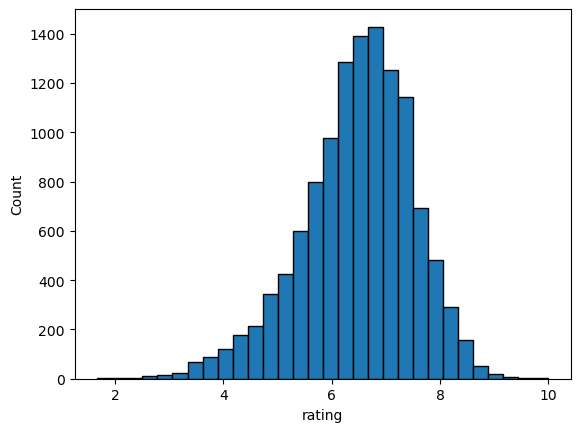

In [258]:
# Looking at the distribution to whether impute with mean,mode or median
plt.hist(df['rating'],edgecolor='black',bins=30)
plt.xlabel('rating')
plt.ylabel('Count')
plt.show()

In [259]:
df['rating']=df['rating'].fillna(np.mean(df['rating']))

In [260]:
# All missing values imputed:
df.isna().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12294 non-null  object 
 3   type      12294 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12294 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [262]:
# we can see that the column episodes is in object format
# another observation is that there is a value 'unknown' present among the numericals which indicate that the anime is ongoing:
# hence we will change the special string to a value 0 and then finally convert the datatype to numerical
df['episodes'].replace({'Unknown': '0'}, inplace=True)
df.episodes.value_counts()

episodes
1      5677
2      1076
12      816
13      572
26      514
       ... 
358       1
366       1
201       1
172       1
125       1
Name: count, Length: 187, dtype: int64

In [263]:
# converting to numerical
df['episodes'] = df['episodes'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12294 non-null  object 
 3   type      12294 non-null  object 
 4   episodes  12294 non-null  int32  
 5   rating    12294 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int32(1), int64(2), object(3)
memory usage: 624.4+ KB


In [264]:
# Basic Eda:

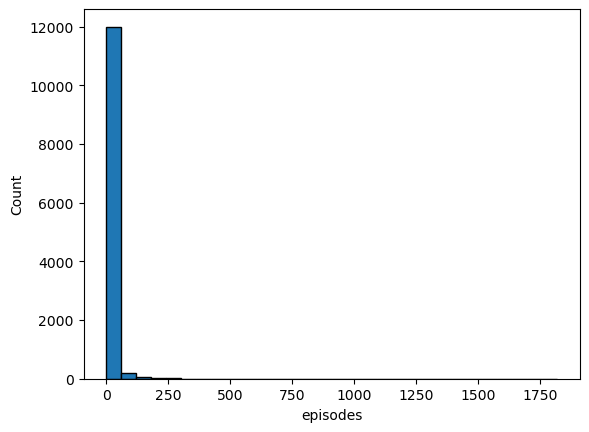

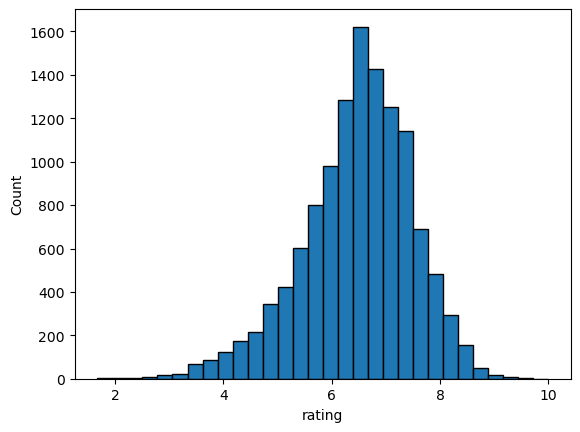

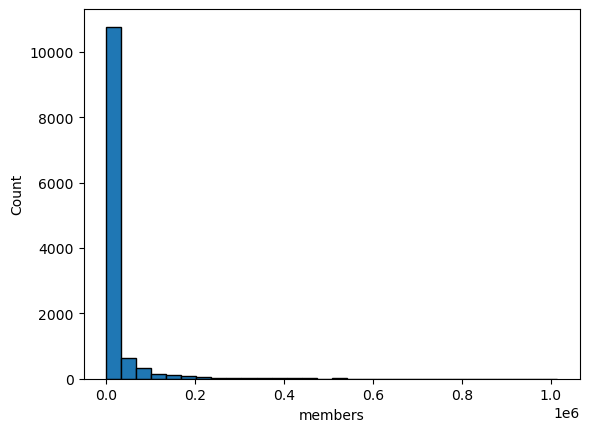

In [265]:
#Histplots for all the numerical variables:
for i in ['episodes','rating', 	'members']:
    plt.hist(df[i],edgecolor='black',bins=30)
    plt.xlabel(f'{i}')
    plt.ylabel('Count')
    plt.show()

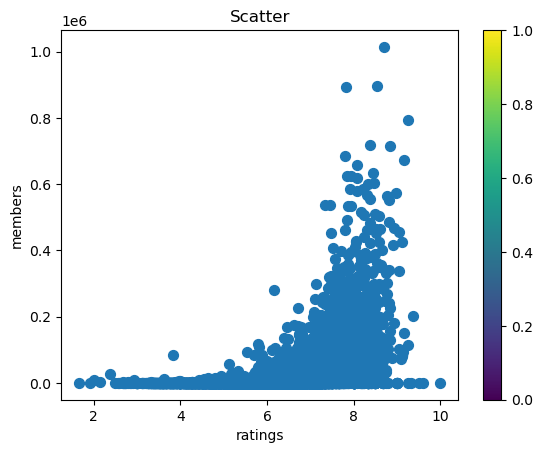

In [266]:
# Member vs ratings:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df['rating'],df['members'],s=50)
ax.set_title('Scatter')
ax.set_xlabel('ratings')
ax.set_ylabel('members')
plt.colorbar(scatter)

In [267]:
# Feature Extraction:

In [268]:
# Feature to be used for computing similarity: Genre,Type and rating:

In [269]:
df2=df.copy()

In [270]:
# Split the transactions into a list of items
df2['genre'] = df2['genre'].apply(lambda x: x.split(','))

In [271]:
# Convert transactions into the required format
te = TransactionEncoder()
te_ary = te.fit(df2['genre']).transform(df2['genre'])
df2 = pd.DataFrame(te_ary, columns=te.columns_)
df2

,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,...,Shoujo,Shounen,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12290,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12291,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12292,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [272]:
# converting boolean into binary
df2=df2*1

In [273]:
df2

,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,...,Shoujo,Shounen,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [274]:
anidf=df[['name']]

In [275]:
anidf

,name
0,Kimi no Na wa.
1,Fullmetal Alchemist: Brotherhood
2,Gintama°
3,Steins;Gate
4,Gintama&#039;
...,...
12289,Toushindai My Lover: Minami tai Mecha-Minami
12290,Under World
12291,Violence Gekiga David no Hoshi
12292,Violence Gekiga Shin David no Hoshi: Inma Dens...


In [276]:
pivot_table = anidf.join(df2)

In [277]:
piv=pivot_table.set_index('name')

In [278]:
piv.index.names = [None]

In [279]:
piv

,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,...,Shoujo,Shounen,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi
Kimi no Na wa.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fullmetal Alchemist: Brotherhood,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Gintama°,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Steins;Gate,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gintama&#039;,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Toushindai My Lover: Minami tai Mecha-Minami,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Under World,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Violence Gekiga David no Hoshi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Violence Gekiga Shin David no Hoshi: Inma Densetsu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [280]:
#Calculating Cosine Similarity between Users
from scipy.spatial.distance import cosine, correlation
from sklearn.metrics.pairwise import cosine_similarity

In [281]:
def recommend_animes(piv, target_anime, threshold=0.5):
    """
    Recommend animes based on cosine similarity scores.

    Parameters:
    piv (pd.DataFrame): Pivot table with genres as columns and animes as index.
    target_anime (str): The anime for which recommendations are to be made.
    threshold (float): Minimum cosine similarity score to consider for recommendations.

    Returns:
    pd.Series: Series containing recommended animes and their similarity scores.
    """
    if target_anime not in piv.index:
        raise ValueError(f"Anime '{target_anime}' not found in the pivot table.")

    # Calculate cosine similarity between animes
    cosine_sim = cosine_similarity(piv)
    cosine_sim_df = pd.DataFrame(cosine_sim, index=piv.index, columns=piv.index)

    # Get similarity scores for the target anime
    sim_scores = cosine_sim_df[target_anime]

    # Filter out the target anime itself
    sim_scores = sim_scores[sim_scores.index != target_anime]

    # Filter by the threshold
    sim_scores = sim_scores[sim_scores >= threshold]

    # Sort by similarity scores in descending order
    sim_scores = sim_scores.sort_values(ascending=False)

    return sim_scores


In [282]:
# Example 1:
# Set the target anime and similarity threshold
target_anime = 'Fullmetal Alchemist: Brotherhood'
threshold = 0.3

# Get recommended animes
recommended_animes = recommend_animes(piv, target_anime, threshold)

print("Recommended Animes:")
print(recommended_animes)

Recommended Animes:
Fullmetal Alchemist                                                    0.935414
Fullmetal Alchemist: The Sacred Star of Milos                          0.935414
Kkomaeosa Ttori                                                        0.857143
Tide-Line Blue                                                         0.845154
Chain Chronicle: Haecceitas no Hikari Part 3                           0.845154
                                                                         ...   
Dual Parallel! Trouble Adventures                                      0.308607
Mobile Suit Gundam ZZ                                                  0.308607
Gear Fighter Dendoh                                                    0.308607
Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shinobu Houjou Dattebayo!    0.308607
To Heart 2: Dungeon Travelers                                          0.308607
Name: Fullmetal Alchemist: Brotherhood, Length: 2500, dtype: float64


In [283]:
# Example 2:
# Set the target anime and similarity threshold
target_anime = 'Steins;Gate'
threshold = 0.8

# Get recommended animes
recommended_animes = recommend_animes(piv, target_anime, threshold)

print("Recommended Animes:")
print(recommended_animes)

Recommended Animes:
Steins;Gate Movie: Fuka Ryouiki no Déjà vu                     1.0
Steins;Gate: Oukoubakko no Poriomania                          1.0
Steins;Gate: Kyoukaimenjou no Missing Link - Divide By Zero    1.0
Steins;Gate 0                                                  1.0
Name: Steins;Gate, dtype: float64


In [284]:
# Example 3:
# Set the target anime and similarity threshold
target_anime = 'Kimi no Na wa.'
threshold = 0.3

# Get recommended animes
recommended_animes = recommend_animes(piv, target_anime, threshold)

print("Recommended Animes:")
print(recommended_animes)

Recommended Animes:
Wind: A Breath of Heart OVA            1.000000
Wind: A Breath of Heart (TV)           1.000000
Touka Gettan                           0.866025
Myself; Yourself                       0.866025
Tokimeki Memorial: Forever With You    0.866025
                                         ...   
Berserk (2016)                         0.316228
Kagee Mukashibanashi                   0.316228
Berserk                                0.316228
Asagiri no Miko                        0.301511
Nihon Animator Mihonichi               0.301511
Name: Kimi no Na wa., Length: 1446, dtype: float64
